# –ú–∞—à–∏–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ, DS-–ø–æ—Ç–æ–∫, –æ—Å–µ–Ω—å 2022
# –ó–∞–¥–∞–Ω–∏–µ 3.7. –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from tqdm.notebook import tqdm


from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from time import time

sns.set(font_scale=1.8, palette='Set2')
warnings.filterwarnings('ignore')

## –¢–µ–æ—Ä–∏—è

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∑–∞–¥–∞—á—É –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –ø—Ä–∏—á–µ–º $\mathscr{Y} = \{+1, -1\}$. –ü—É—Å—Ç—å —Ç–∞–∫ –∂–µ $\widehat{y}$ &mdash; –Ω–µ–∫–æ—Ç–æ—Ä—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä, –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—â–∏–π <u><i>—Å—Ç–µ–ø–µ–Ω—å –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏</i></u> –∫–ª–∞—Å—Å—É. –ü—Ä–∏ —ç—Ç–æ–º —Ä–µ—à–∞—é—â–µ–µ –ø—Ä–∞–≤–∏–ª–æ –∏–º–µ–µ—Ç –≤–∏–¥ 
 $f(x) = \text{sign}\left(\widehat{y}(x)\right)$.
–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å:
$$\mathcal{L}(y, z) = \log \big(1 + \exp(-yz) \big).$$

### –ó–∞–¥–∞—á–∞ 1

–ü–æ–∫–∞–∂–∏—Ç–µ, —á—Ç–æ –∑–∞–¥–∞—á–∞ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ —Ñ—É–Ω–∫—Ü–∏—è–º $y(x)$ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞ –æ—à–∏–±–∫–∏ $$Q(\widehat{y}) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, y(x_i)\right) \longrightarrow \min_{y(x)}$$ –¥–ª—è –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω–∞ –º–∞–∫—Å–∏–º–∏–∑–∞—Ü–∏–∏ –ø–æ $y(x)$ —Ñ—É–Ω–∫—Ü–∏–∏ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è –≤ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–∏ $Y_i \sim Bern(\sigma(y(x_i)))$, –≥–¥–µ $Y_i \in \{-1, +1 \}$.

### –ó–∞–¥–∞—á–∞ 2

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ —Å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π –ø–æ—Ç–µ—Ä—å. –í—ã–ø–∏—à–∏—Ç–µ –¥–ª—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ —Ñ–æ—Ä–º—É–ª—É –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∞ —Å–¥–≤–∏–≥–æ–≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∏ –∑–∞–¥–∞—á—É –ø–æ–∏—Å–∫–∞ –Ω–æ–≤–æ–π –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ –ø–æ –∏—Ö –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—é. 

### –ó–∞–¥–∞—á–∞ 3

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, –º–æ–¥–µ–ª—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ $\widehat{y}_{t - 1}$ —É–∂–µ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∞.
1. –í—ã–ø–∏—à–∏—Ç–µ –≤–∏–¥ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞ –æ—à–∏–±–∫–∏ $Q(\widehat{y}_t) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, \widehat{y}_t(x_i)\right)$ –¥–ª—è –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å. –û–¥–∏–Ω–∞–∫–æ–≤—ã–π –ª–∏ –≤–∫–ª–∞–¥ –≤–Ω–æ—Å—è—Ç —Ä–∞–∑–Ω—ã–µ –æ–±—ä–µ–∫—Ç—ã –≤ –æ—à–∏–±–∫—É –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –Ω–æ–≤–æ–π –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ $b_t$?
2. –ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ —Ñ–æ—Ä–º—É–ª—É –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∞ —Å–¥–≤–∏–≥–æ–≤, –ø–æ–ª—É—á–µ–Ω–Ω—É—é –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–π –∑–∞–¥–∞—á–µ. –ö–∞–∫ –æ–Ω–∞ –≤—ã—Ä–∞–∂–∞–µ—Ç—Å—è —á–µ—Ä–µ–∑ –æ—Ç–∫–ª–∏–∫–∏ –Ω–∞ –æ–±—ä–µ–∫—Ç–∞—Ö –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏? –û–¥–∏–Ω–∞–∫–æ–≤—ã–π –ª–∏ –≤–∫–ª–∞–¥ –≤–Ω–æ—Å—è—Ç —Ä–∞–∑–Ω—ã–µ –æ–±—ä–µ–∫—Ç—ã –≤ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–∞ —Å–¥–≤–∏–≥–æ–≤ –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –Ω–æ–≤–æ–π –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ $b_t$?
3.  –ù–∞ –ª–µ–∫—Ü–∏–∏ –±—ã–ª–æ –ø–æ–∫–∞–∑–∞–Ω–æ, —á—Ç–æ –¥–ª—è —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –µ—Å—Ç—å –ø—Ä–æ–±–ª–µ–º–∞: –±–∞–∑–æ–≤—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –º–æ–∂–µ—Ç –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞—Ç—å—Å—è —Ç–æ–ª—å–∫–æ –Ω–∞ —à—É–º–æ–≤—ã–µ –æ–±—ä–µ–∫—Ç—ã. –ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è –ª–∏ —Ç–∞–∫–∞—è –ø—Ä–æ–±–ª–µ–º–∞ —É –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å? –ö–∞–∫ –æ–Ω–∞ –≤–µ–¥–µ—Ç —Å–µ–±—è –Ω–∞ –æ–±—ä–µ–∫—Ç–∞—Ö —Å —Å–∏–ª—å–Ω–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–º, –æ–∫–æ–ª–æ–Ω—É–ª–µ–≤—ã–º, —Å–∏–ª—å–Ω–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º –æ—Ç—Å—É–ø–∞–º–∏?

### –ó–∞–¥–∞—á–∞ 4

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –Ω–∞–¥ —Ä–µ—à–∞—é—â–∏–º–∏ –¥–µ—Ä–µ–≤—å—è–º–∏. –ü–æ—Å–ª–µ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–µ—Ä–µ–≤–∞ –±—É–¥–µ–º –¥–µ–ª–∞—Ç—å –ø–µ—Ä–µ–Ω–∞—Å—Ç—Ä–æ–π–∫—É –≤ –ª–∏—Å—Ç—å—è—Ö –¥–µ—Ä–µ–≤–∞.
1. –í—ã–ø–∏—à–∏—Ç–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–æ–Ω–Ω—É—é –∑–∞–¥–∞—á—É –¥–ª—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ $\gamma_{tj}$ &mdash; –Ω–æ–≤—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ –≤ –ª–∏—Å—Ç—å—è—Ö.
2. –†–µ—à–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω—É—é –∑–∞–¥–∞—á—É —Å–¥–µ–ª–∞–≤ –æ–¥–∏–Ω —à–∞–≥ –º–µ—Ç–æ–¥–∞ –ù—å—é—Ç–æ–Ω–∞ –∏–∑ –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è $\gamma_{tj} = 0$, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—é –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ $b_t$.


## –ü—Ä–∞–∫—Ç–∏–∫–∞

### –ó–∞–¥–∞—á–∞ 5

**–í–Ω–∏–º–∞–Ω–∏–µ!** 

–ü–µ—Ä–µ–¥ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ–º –∑–∞–¥–∞—á–∏ –ø—Ä–æ—á–∏—Ç–∞–π—Ç–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é —É—Å–ª–æ–≤–∏–µ. –í –∑–∞–¥–∞—á–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è —Å–º–µ—Å–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π —Å —Ä–∞–∑–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏. –ü–æ–¥—É–º–∞–π—Ç–µ –Ω–∞–¥ —Ç–µ–º, –∫–∞–∫–æ–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –∫–∞–∫ –ø–æ–¥–±–∏—Ä–∞—Ç—å –∏ –Ω–∞ –∫–∞–∫–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ. –ù–µ –∑–∞–±—É–¥—å—Ç–µ, —á—Ç–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ, –ø–æ –∫–æ—Ç–æ—Ä–æ–π –¥–µ–ª–∞—é—Ç—Å—è –∏—Ç–æ–≥–æ–≤—ã–µ –≤—ã–≤–æ–¥—ã, –Ω–∏—á–µ–≥–æ –Ω–µ –¥–æ–ª–∂–Ω–æ –æ–±—É—á–∞—Ç—å—Å—è.

**–ù–µ –∑–∞–±—ã–≤–∞–π—Ç–µ –¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –≤ –∫–∞–∂–¥–æ–º –ø—É–Ω–∫—Ç–µ!**

In [6]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### 1.

–ü–æ–≤—Ç–æ—Ä–∏—Ç–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ, –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–µ –≤ –∑–∞–¥–∞—á–µ 3 –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –¥–æ–º–∞—à–Ω–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è, –∏—Å–ø–æ–ª—å–∑—É—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –∏–∑ `sklearn`. –°—Ä–∞–≤–Ω–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ —Å–ª—É—á–∞–π–Ω—ã–º –ª–µ—Å–æ–º. 

–í–∫—Ä–∞—Ç—Ü–µ –æ–ø–∏—à–µ–º –∑–∞–¥–∞–Ω–∏—è:
1. –ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –∫–∞–∫ –º–µ–Ω—è–µ—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∑–Ω–∞—á–µ–Ω–∏–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º. –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
    * –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–µ—Ä–µ–≤—å–µ–≤ (`n_estimators`) [–æ—Ç 1 –¥–æ 400];
    * –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≥–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤–∞ (`max_depth`) [–æ—Ç 3 –¥–æ 15];
    * —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è (`learning_rate`), –ø–æ—è—Å–Ω–∏—Ç–µ —Ç–∞–∫–∂–µ —Å–º—ã—Å–ª —ç—Ç–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞.
2. –ó–∞–ø—É—Å—Ç–∏—Ç–µ –º–æ–¥–µ–ª—å —Ç—Ä–∏ —Ä–∞–∑–∞ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –ø–æ-—É–º–æ–ª—á–∞–Ω–∏—é. –û–±—ä—è—Å–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.
3. –ü–æ–¥–±–µ—Ä–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã, —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–µ –≤ –ø–µ—Ä–≤–æ–º –ø—É–Ω–∫—Ç–µ –∏ –∑–∞—Ñ–∏–∫—Å–∏—Ä—É–π—Ç–µ –∏—Ö.
4. –ò—Å—Å–ª–µ–¥—É–π—Ç–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Ä–∞–∑–±–∏–µ–Ω–∏–µ –≤ –≤–µ—Ä—à–∏–Ω–µ –¥–µ—Ä–µ–≤–∞. –û–±—ä—è—Å–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

*–ó–∞–º–µ—á–∞–Ω–∏—è.*
* –í –∫–∞—á–µ—Å—Ç–≤–µ –æ—Å–Ω–æ–≤—ã –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–∞–∫ —Å–≤–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è, —Ç–∞–∫ –∏ –≤—ã–ª–æ–∂–µ–Ω–Ω–æ–µ –Ω–∞ –í–∏–∫–∏. –í –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤ –Ω—É–∂–Ω–æ —Ç–æ–ª—å–∫–æ –∑–∞–º–µ–Ω–∏—Ç—å `RandomForestRegressor` –Ω–∞ `GradientBoostingRegressor`.
* –ü—Ä–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ –º–µ—Ç–æ–¥–æ–≤ –ø–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º —Å–≤–æ–π—Å—Ç–≤–∞–º –∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ —Ä–∏—Å–æ–≤–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–∞ –æ–¥–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ.
* –û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –º–µ—Ç–æ–¥ `staged_predict` —É `GradientBoostingRegressor`. –û–Ω –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø–æ–ª—É—á–∏—Ç—å "–∫—É–º—É–ª—è—Ç–∏–≤–Ω—ã–µ" –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, —Ç–æ –µ—Å—Ç—å –ø–æ –ø–µ—Ä–≤—ã–º $t$ –¥–µ—Ä–µ–≤—å—è–º –ø–æ –≤—Å–µ–º –∑–Ω–∞—á–µ–Ω–∏—è–º $t$.
* –ü—Ä–∏ –∂–µ–ª–∞–Ω–∏–∏, –≥—Ä–∞–Ω–∏—Ü—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å.
* –ü—Ä–∏ –ø–æ–¥–±–æ—Ä–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Ä–∞–Ω–¥–æ–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –ø–æ–∏—Å–∫–∞ –ø—Ä–æ–≤–æ–¥–∏—Ç–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞ –±–æ–ª—å—à–æ–π —Å–µ—Ç–∫–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ &mdash; –∫–∞–∫ –º–∏–Ω–∏–º—É–º 50. –î–∞–∂–µ –µ—Å–ª–∏ –¥–æ–ª–≥–æ –æ–±—É—á–∞–µ—Ç—Å—è.

*1. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –æ—Ç –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤*

In [8]:
md_grid = np.arange(3, 16)
mses = []

for md in md_grid:
    m = GradientBoostingRegressor(max_depth=md)
    m.fit(X_train, y_train)
    mse = mean_squared_error(y_test, m.predict(X_test))
    mses.append(mse)

mses = np.array(mses)

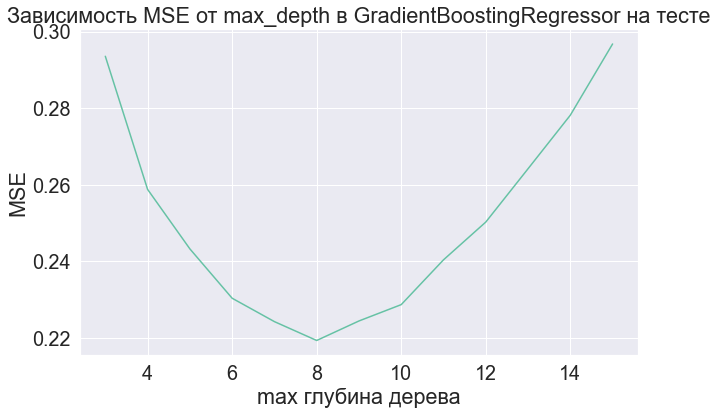

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(md_grid, mses)
plt.xlabel('max –≥–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤–∞')
plt.ylabel('MSE')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å MSE –æ—Ç max_depth –≤ GradientBoostingRegressor –Ω–∞ —Ç–µ—Å—Ç–µ');

In [10]:
m = GradientBoostingRegressor(n_estimators=400)
m.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=400)

In [11]:
cum_preds = np.array(list(m.staged_predict(X_test)))

In [12]:
cum_mse = [mean_squared_error(y_test, pred) for pred in cum_preds]

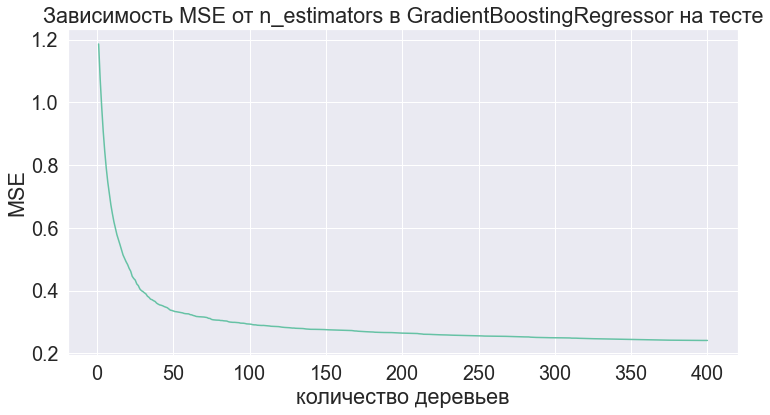

In [13]:
nestimators_grid = np.arange(1, 401)
plt.figure(figsize=(12, 6))
plt.plot(nestimators_grid, cum_mse)
plt.xlabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–µ—Ä–µ–≤—å–µ–≤')
plt.ylabel('MSE')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å MSE –æ—Ç n_estimators –≤ GradientBoostingRegressor –Ω–∞ —Ç–µ—Å—Ç–µ');

In [14]:
lr_grid = np.arange(1e-6, 1, 0.01)
mses = []

for lr in lr_grid:
    m = GradientBoostingRegressor(learning_rate=lr)
    m.fit(X_train, y_train)
    mse = mean_squared_error(y_test, m.predict(X_test))
    mses.append(mse)

mses = np.array(mses)

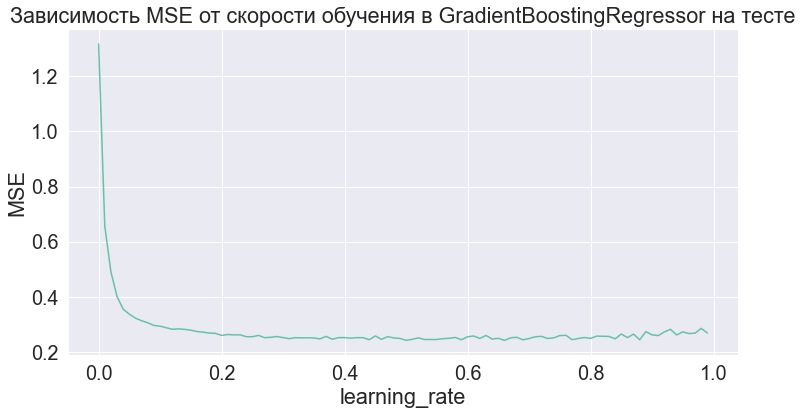

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(lr_grid, mses)
plt.xlabel('learning_rate')
plt.ylabel('MSE')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å MSE –æ—Ç —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è –≤ GradientBoostingRegressor –Ω–∞ —Ç–µ—Å—Ç–µ');

In [16]:
print('–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π learning rate', round(lr_grid[np.argmin(mses)], 2))

–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π learning rate 0.66


***–í—ã–≤–æ–¥*** *1) –í –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–º —Å–ø—É—Å–∫–µ –º–µ–Ω—å—à—É—é –æ—à–∏–±–∫—É –¥–∞—é—Ç –¥–µ—Ä–µ–≤—å—è –Ω–µ–±–æ–ª—å—à–æ–π –≥–ª—É–±–∏–Ω—ã. –í–∏–¥–∏–º –ø–æ –≥—Ä–∞—Ñ–∏–∫—É, —á—Ç–æ –µ—Å—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≥–ª—É–±–∏–Ω—ã = 8, –∞ –±–æ–ª–µ–µ –≥–ª—É–±–æ–∫–∏–µ –¥–µ—Ä–µ–≤—å—è –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –ø–æ–≤—ã—à–∞—é—Ç –æ—à–∏–±–∫—É –Ω–∞ —Ç–µ—Å—Ç–µ - —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç –ø–µ—Ä–µ—É—á–µ–Ω–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–π–Ω–µ (–Ω–∏–∑–∫–æ–µ bias, –±–æ–ª—å—à–æ–π variance). –ü–æ—ç—Ç–æ–º—É –∏—Å–ø–æ–ª—å–∑—É—é—Ç –Ω–µ–≥–ª—É–±–æ–∫–∏–µ –¥–µ—Ä–µ–≤—å—è, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç–¥–µ–ª—å–Ω–æ –∏–º–µ—é—Ç –≤—ã—Å–æ–∫–∏–π bias, –Ω–æ –ø–æ—Å–ª–µ –∏—Ç–µ—Ä–∞—Ç–∏–≤–Ω–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –æ–Ω –±—É–¥–µ—Ç –Ω–∏–∂–µ.*

*2) –í –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–º –±—É—Å—Ç–∏–Ω–≥–µ, –∫–∞–∫ –≤ –æ–¥–Ω–æ–π –∏–∑ –º–æ–¥–µ–ª–µ–π –∞–Ω—Å–∞–º–±–ª–µ–π, –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ —É–ª—É—á–∞—à–∞–µ—Ç—Å—è –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π. –≠—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –ø–æ—Ç–æ–º—É, —á—Ç–æ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è variance. –ü–æ—Å–ª–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–æ –æ—Å–æ–±–æ –Ω–µ —É–ª—É—á—à–∞–µ—Ç—Å—è, –ø–æ—ç—Ç–æ–º—É –º–æ–∂–Ω–æ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–µ–¥–µ–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ*

*3) –°–º—ã—Å–ª learning rate –≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–º –±—É—Å—Ç–∏–Ω–≥–µ - –±–æ—Ä—å–±–∞ —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º. –ü—Ä–∏—Å—É—Ç—Å—Ç–≤–∏–µ —ç—Ç–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –∫–∞–∂–¥—ã–π –±–∞–∑–æ–≤—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –≤–Ω–æ—Å–∏—Ç –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–µ–±–æ–ª—å—à–æ–π –≤–∫–ª–∞–¥ –≤–æ –≤—Å—é –∫–æ–º–ø–æ–∑–∏—Ü–∏—é. –û–Ω —Ç–∞–∫–∂–µ –ø–æ–¥–±–∏—Ä–∞–µ—Ç—Å—è —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–∏. –ù–∞ —Ç–µ–∫—É—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏ –¥–µ—Ñ–æ–ª—Ç–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö —ç—Ç–æ ~0.5*



*2. C–ª—É—á–∞–π–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è*

In [17]:
for i in range(3):
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    print(f'MSE –Ω–∞ —Ç–µ—Å—Ç–µ = {mean_squared_error(y_test, model.predict(X_test))}')


MSE –Ω–∞ —Ç–µ—Å—Ç–µ = 0.2935484140024643
MSE –Ω–∞ —Ç–µ—Å—Ç–µ = 0.2935476555015737
MSE –Ω–∞ —Ç–µ—Å—Ç–µ = 0.2935476555015737


***–í—ã–≤–æ–¥***: *–ü—Ä–∏–∑–Ω–∞–∫–º –≤—Å–µ–≥–¥–∞ —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –ø–µ—Ä–µ—Å—Ç–∞–≤–ª—è—é—Ç—Å—è –ø—Ä–∏ –∫–∞–∂–¥–æ–º —Å–ø–ª–∏—Ç–µ. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –Ω–∞–∏–ª—É—á—à–∏–π –Ω–∞–π–¥–µ–Ω–Ω—ã–π —Å–ø–ª–∏—Ç –º–æ–∂–µ—Ç —Ä–∞–∑–ª–∏—á–∞—Ç—å—Å—è –¥–∞–∂–µ –ø—Ä–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã—Ö –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∏ max_features=n_features. –ß—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –¥–µ—Ç–µ—Ä–º–∏–Ω–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –≤–æ –≤—Ä–µ–º—è –ø–æ–¥–±–æ—Ä–∞, –Ω—É–∂–Ω–æ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä `random_state`*

*3) –ü–æ–¥–±–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤*

*–ü—Ä–∏ –ø–æ–¥–±–æ—Ä–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–ª—É—á–∞–π–Ω—ã–π –ø–æ–∏—Å–∫* 

In [18]:
rnd_boosting_gridsearch = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions={
        'learning_rate': np.linspace(0.1, 0.8, 50),
        'n_estimators': np.arange(50, 100),
        'max_depth': [3, 4, 5, 6, 8, 9, 10]
    },
    cv=5,
    n_jobs=-2,
    n_iter=50,
    random_state=42
)

In [19]:
rnd_boosting_gridsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'learning_rate': array([0.1       , 0.11428571, 0.12857143, 0.14285714, 0.15714286,
       0.17142857, 0.18571429, 0.2       , 0.21428571, 0.22857143,
       0.24285714, 0.25714286, 0.27142857, 0.28571429, 0.3       ,
       0.31428571, 0.32857143, 0.34285714, 0.35714286, 0.37142857,
       0.38571429...
       0.6       , 0.61428571, 0.62857143, 0.64285714, 0.65714286,
       0.67142857, 0.68571429, 0.7       , 0.71428571, 0.72857143,
       0.74285714, 0.75714286, 0.77142857, 0.78571429, 0.8       ]),
                                        'max_depth': [3, 4, 5, 6, 8, 9, 10],
                                        'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 9

In [20]:
rnd_boosting_gridsearch.best_estimator_

GradientBoostingRegressor(learning_rate=0.15714285714285714, max_depth=6,
                          n_estimators=85, random_state=42)

*–ö–∞—á–µ—Å—Ç–≤–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏:*

In [21]:
print('Train MSE {:.4f}'.format(
    mean_squared_error(rnd_boosting_gridsearch.predict(X_train), y_train)
))
print('Test accuracy {:.4f}'.format(
    mean_squared_error(rnd_boosting_gridsearch.predict(X_test), y_test)
))

Train MSE 0.1079
Test accuracy 0.2260


In [22]:
rnd_boosting_gridsearch.best_params_

{'n_estimators': 85, 'max_depth': 6, 'learning_rate': 0.15714285714285714}

***–í—ã–≤–æ–¥*** *–ü–æ–∏—Å–∫ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ —Å–µ—Ç–∫–µ –¥–∞–ª –ø—Ä–µ–¥—Å–∫–∞–∑—É–µ–º—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç - max_depth –∏ learning_rate —Å—Ç–∞–ª–∏ –Ω–∏–∂–µ –¥–µ—Ñ–æ–ª—Ç–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. –û–±–∞ —ç—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —É–º–µ–Ω—å—à–∞—é—Ç—Å—è –¥–ª—è –∏—Å–∫–ª—é—á–µ–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –¥–µ—Ä–µ–≤–∞, —Ç–æ –µ—Å—Ç—å –¥–ª—è —Å–Ω–∏–∂–µ–Ω–∏—è variance –æ–±—â–µ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è*

*4. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –∏—â—É—Ç—Å—è –ø–æ—Ä–æ–≥–∏*

In [23]:
features_grid = np.arange(1, X_train.shape[1] + 1) / X_train.shape[1]

mses_f = []

for f_p in features_grid:
    m = GradientBoostingRegressor(**rnd_boosting_gridsearch.best_params_, subsample=f_p)
    m.fit(X_train, y_train)
    mse = mean_squared_error(y_test, m.predict(X_test))
    mses_f.append(mse)

mses_f = np.array(mses_f)

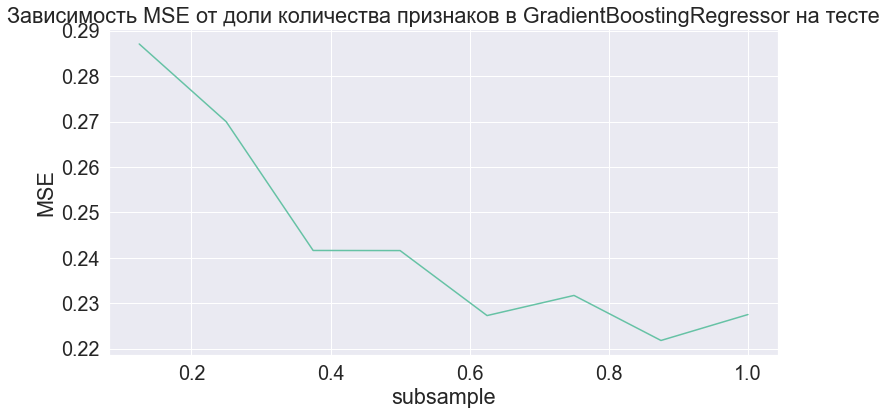

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(features_grid, mses_f)
plt.xlabel('subsample')
plt.ylabel('MSE')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å MSE –æ—Ç –¥–æ–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ GradientBoostingRegressor –Ω–∞ —Ç–µ—Å—Ç–µ');

In [25]:
print('–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π subsamlpe', round(features_grid[np.argmin(mses_f)], 2))

–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π subsamlpe 0.88


***–í—ã–≤–æ–¥***: *–ß–µ–º –º–µ–Ω—å—à–µ –¥–æ–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –¥–ª—è —Ä–∞–∑–±–∏–µ–Ω–∏—è, —Ç–µ–º —É –∫–∞–∂–¥–æ–≥–æ –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ –¥–µ—Ä–µ–≤–∞ –≤—ã—à–µ —Å–º–µ—â–µ–Ω–∏–µ.  –¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏ –¥–æ–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è, —á—Ç–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –¥–∞–µ—Ç –ª—É—á—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ, –µ—Å–ª–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è —Å–ª–∞–±—ã–µ –±–∞–∑–æ–≤—ã–µ –º–æ–¥–µ–ª–∏ —Å –≤—ã—Å–æ–∫–∏–º —Å–º–µ—â–µ–Ω–∏–µ–º, –Ω–æ –Ω–∏–∑–∫–∏–º varience. –≠—Ç–æ—Ç –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –æ–±—ã—á–Ω–æ –±–µ—Ä—É—Ç –ø–æ –ø—Ä–∞–≤–∏–ª—É "–∫–æ—Ä–µ–Ω—å –∏–∑ —á–∏—Å–ª–∞ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ —Ç—Ä–µ—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏". –ù–æ —ç—Ç–æ —Ç–æ–ª—å–∫–æ "rule of thumb", —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –Ω–∞–¥–æ —Ç–∞–∫ –∂–µ –ø–æ–¥–±–∏—Ä–∞—Ç—å –ø–æ —Å–µ—Ç–∫–µ –ø–æ–¥ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ. –ü–æ –º–æ–µ–º—É –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—é –º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –ø—Ä–∏ –¥–æ–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ–∫–æ–ª–æ 0.8. –ó–∞—Ñ–∏–∫—Å–∏—Ä—É—é —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä.*

*–ò—Ç–æ–≥–æ –ø–æ–ª—É—á–∏–ª–∏ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞:*

In [26]:
optimal_params = {'subsample': features_grid[np.argmin(mses_f)], **rnd_boosting_gridsearch.best_params_}
optimal_params

{'subsample': 0.875,
 'n_estimators': 85,
 'max_depth': 6,
 'learning_rate': 0.15714285714285714}

In [27]:
best_gb_model = GradientBoostingRegressor(**optimal_params)
best_gb_model.fit(X_train, y_train)

print('Train MSE {:.4f}'.format(
    mean_squared_error(best_gb_model.predict(X_train), y_train)
))
print('Test accuracy {:.4f}'.format(
    mean_squared_error(best_gb_model.predict(X_test), y_test)
))

Train MSE 0.1107
Test accuracy 0.2277


**2.**

–ü—Ä–æ–≤–µ–¥–∏—Ç–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ –∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ —Ä–∞–Ω–µ–µ, –ø–æ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –≤ —Ä–∞–º–∫–∞—Ö –∫–æ—Ç–æ—Ä–æ–≥–æ –≤—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–ª–µ–¥—É—é—â–∏–µ –¥–µ–π—Å—Ç–≤–∏—è.
* –ó–∞–º–µ—Ä—å—Ç–µ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π.
* –ó–∞–º–µ—Ä—å—Ç–µ –≤—Ä–µ–º—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É, –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª (–≤–æ–∑—å–º–∏—Ç–µ –≤—ã–±–æ—Ä–æ—á–Ω—ã–µ –∫–≤–∞–Ω—Ç–∏–ª–∏).
* –°—Ä–∞–≤–Ω–∏—Ç–µ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫—É—é –≥–ª—É–±–∏–Ω—É –¥–µ—Ä–µ–≤—å–µ–≤ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∏—Å—Ç—å–µ–≤ –≤ –∫–æ–º–ø–æ–∑–∏—Ü–∏—è—Ö —Å –ø–æ–º–æ—â—å—é –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ —Ç–∞–∫–∂–µ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —É–∫–∞–∑–∞–Ω–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ç–æ–¥—ã `get_depth()` –∏ `get_n_leaves()` —É —Ä–µ—à–∞—é—â–µ–≥–æ –¥–µ—Ä–µ–≤–∞.

In [64]:
optimal_params

{'subsample': 0.875,
 'n_estimators': 85,
 'max_depth': 6,
 'learning_rate': 0.15714285714285714}

In [28]:
best_rf_model = RandomForestRegressor(max_depth=24, n_estimators=48, max_features=2)

In [29]:
%%time
best_rf_model.fit(X_train, y_train)

CPU times: user 1.6 s, sys: 41.9 ms, total: 1.65 s
Wall time: 1.65 s


RandomForestRegressor(max_depth=24, max_features=2, n_estimators=48)

In [30]:
%%time
best_gb_model.fit(X_train, y_train)

CPU times: user 5.55 s, sys: 25.1 ms, total: 5.57 s
Wall time: 5.57 s


GradientBoostingRegressor(learning_rate=0.15714285714285714, max_depth=6,
                          n_estimators=85, subsample=0.875)

*–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ —É—á–∏—Ç—Å—è –º–µ–¥–ª–µ–Ω–Ω–µ–π. –≠—Ç–æ –æ–∂–∏–¥–∞–µ–º–æ, —Ç–∞–∫ –∫–∞–∫ –æ–±—É—á–µ–Ω–∏–µ –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–µ, –∞ –≤ —Å–ª—É—á–∞–π–Ω–æ–º –ª–µ—Å—É - –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ–µ.*

In [31]:
X_test_separated = X_test.reshape(X_test.shape[0], 1, -1)

In [32]:
gb_predict_times = []

for test_elem in X_test_separated:
    start = time()
    best_gb_model.predict(test_elem)
    end = time()
    gb_predict_times.append(end - start)

In [33]:
rf_predict_times = []

for test_elem in X_test_separated:
    start = time()
    best_gb_model.predict(test_elem)
    end = time()
    rf_predict_times.append(end - start)

In [34]:
gb_predict_times = np.array(gb_predict_times)
rf_predict_times = np.array(rf_predict_times)

mean_gb = gb_predict_times.mean()
mean_rf = rf_predict_times.mean()

gb_q1, gb_q2 = np.quantile(gb_predict_times, 0.25), np.quantile(gb_predict_times, 0.75)
rf_q1, rf_q2 = np.quantile(rf_predict_times, 0.25), np.quantile(rf_predict_times, 0.75)

*–î–ª—è –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —É–±–µ—Ä–µ–º –≤—ã–±—Ä–æ—Å—ã –ø–æ –≤—Ä–µ–º–µ–Ω–∏*

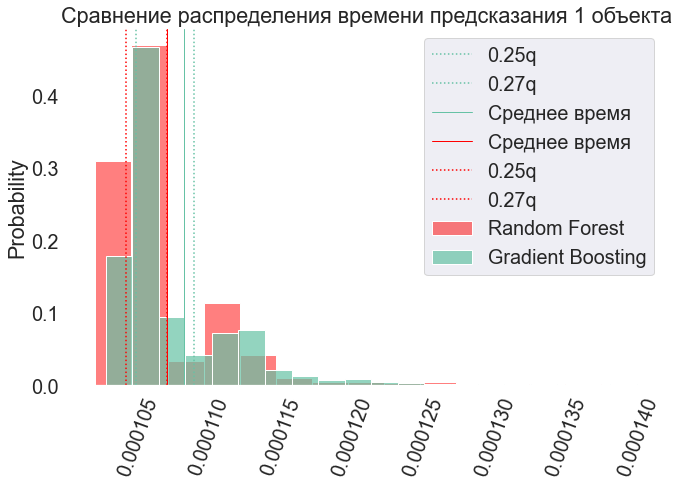

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(rf_predict_times[np.where(rf_predict_times < 0.00014)], alpha=0.5, bins=15, 
             stat='probability', color='r', label='Random Forest')
sns.histplot(gb_predict_times[np.where(gb_predict_times < 0.00014)], alpha=0.7, bins=20, 
             stat='probability',  label='Gradient Boosting')
plt.axvline(gb_q1, label='0.25q', ls=':')
plt.axvline(gb_q2, label='0.27q', ls=':')

plt.axvline(mean_gb, label='–°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è', lw=1)
plt.axvline(mean_rf, color='r', label='–°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è', lw=1)


plt.axvline(rf_q1, color='r', label='0.25q', ls=':')
plt.axvline(rf_q2, color='r', label='0.27q', ls=':')

plt.gca().set_facecolor('white')
plt.tight_layout()
plt.xticks(rotation=70)
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è 1 –æ–±—ä–µ–∫—Ç–∞')
plt.legend();

*–í–∏–¥–∏–º, —á—Ç–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –±—É—Å—Ç–∏–Ω–≥–∞ –≤ —Å—Ä–µ–¥–Ω–µ–º –±—ã—Å—Ç—Ä–µ–µ.*

*–§–∞–∫—Ç–∏—á–µ–∫–∞—è –≥–ª—É–±–∏–Ω–∞ –≤–µ–∑–¥–µ –æ–¥–Ω–∞ - —ç—Ç–æ max_depth –≤ –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏*

In [36]:
np.all([estimator.get_depth() == best_rf_model.max_depth for estimator in best_rf_model.estimators_])

True

In [37]:
np.all([estimator[0].get_depth() == best_gb_model.max_depth for estimator in best_gb_model.estimators_])

True

*A –≤–æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∏—Å—Ç—å–µ–≤ —É –¥–µ—Ä–µ–≤—å–µ–≤ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è*

In [38]:
rf_n_leaves = [estimator.get_n_leaves() for estimator in best_rf_model.estimators_]
mean_rf_leaves = np.mean(rf_n_leaves)

In [39]:
gb_n_leaves = [estimator[0].get_n_leaves() for estimator in best_gb_model.estimators_]
mean_gb_leaves = np.mean(gb_n_leaves)

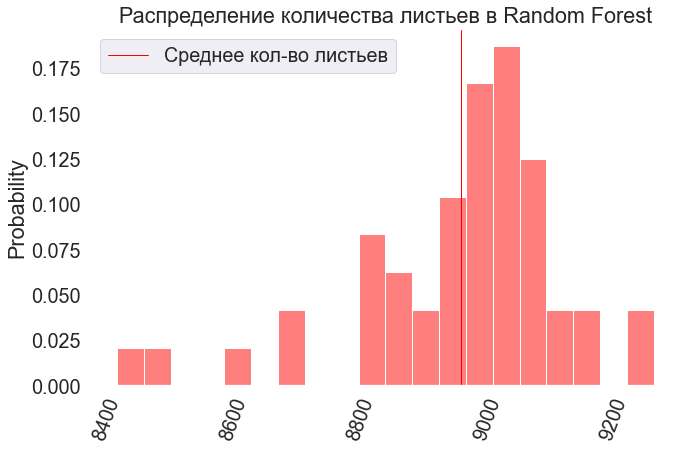

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(rf_n_leaves, alpha=0.5, bins=20, stat='probability', color='r')

plt.axvline(mean_rf_leaves, color='r', label='–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª-–≤–æ –ª–∏—Å—Ç—å–µ–≤', lw=1)

plt.gca().set_facecolor('white')
plt.tight_layout()
plt.xticks(rotation=70)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ª–∏—Å—Ç—å–µ–≤ –≤ Random Forest')
plt.legend();

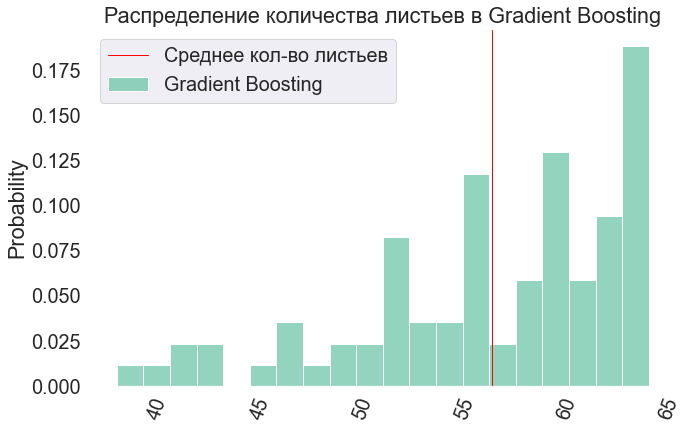

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(gb_n_leaves, alpha=0.7, bins=20, stat='probability',  label='Gradient Boosting')
plt.axvline(mean_gb_leaves, label='–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª-–≤–æ –ª–∏—Å—Ç—å–µ–≤', lw=1, c='r')

plt.gca().set_facecolor('white')
plt.tight_layout()
plt.xticks(rotation=70)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ª–∏—Å—Ç—å–µ–≤ –≤ Gradient Boosting')
plt.legend();

–î–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–æ–ª–µ–µ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ —Ç–∞–∫ –∫–∞–∫ –º—ã –Ω–µ —É–ø–∏—Ä–∞–µ–º—Å—è –≤ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–æ–∑–º–æ–∂–Ω–æ–µ —á–∏—Å–ª–æ –ª–∏—Å—Ç—å–µ–≤. –£ –±—É—Å—Ç–∏–Ω–≥–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∏—Å—Ç—å–µ–≤ –∏–º–µ–µ—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Å–∫–æ—à–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –Ω–µ –ø—Ä–µ–≤—ã—à–∞–µ—Ç 64. 

#### 3. 

–í—ã–±–µ—Ä–∏—Ç–µ —Å–∞–º—ã–π –∑–Ω–∞—á–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫ —Å–æ–≥–ª–∞—Å–Ω–æ `feature_importances_`. –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ä–∞–±–æ—Ç—É –±—É—Å—Ç–∏–Ω–≥–∞, –æ–±—É—á–µ–Ω–Ω–æ–≥–æ —Ç–æ–ª—å–∫–æ –Ω–∞ –æ–¥–Ω–æ–º —ç—Ç–æ–º –ø—Ä–∏–∑–Ω–∞–∫–µ.

–î–ª—è —ç—Ç–æ–≥–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏—Ç–µ –ø—Ä–æ—Ü–µ—Å—Å –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –±—É—Å—Ç–∏–Ω–≥–∞ –¥–ª—è –ø–µ—Ä–≤—ã—Ö 10 –∏—Ç–µ—Ä–∞—Ü–∏–π. –ü—Ä–∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ç—Ä–µ–±—É–µ—Ç—Å—è –¥–ª—è –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –Ω–∞—Ä–∏—Å–æ–≤–∞—Ç—å:
* –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–æ–≤–æ–π –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ –∏ –≤—ã–±–æ—Ä–∫—É, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–π —ç—Ç–∞ –±–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è;
* –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ç–µ–∫—É—â–µ–π –∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –∏ –∏—Å—Ö–æ–¥–Ω—É—é –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É. 

–ü—Ä–∏–º–µ—Ä –≥—Ä–∞—Ñ–∏–∫–æ–≤ —Å–º–æ—Ç—Ä–∏—Ç–µ –≤ –ª–µ–∫—Ü–∏–∏ –≤ —Ä–∞–∑–¥–µ–ª–µ –±—É—Å—Ç–∏–Ω–≥ –≤ –∑–∞–¥–∞—á–µ —Ä–µ–≥—Ä–µ—Å–∏–∏.

In [56]:
imp_feature_train = X_train[:, np.argmax(best_gb_model.feature_importances_)].reshape(-1, 1)

best_gb_model.fit(imp_feature_train, y_train)

GradientBoostingRegressor(learning_rate=0.15714285714285714, max_depth=6,
                          n_estimators=85, subsample=0.875)

In [57]:
cum_preds = np.array(list(best_gb_model.staged_predict(imp_feature_train)))

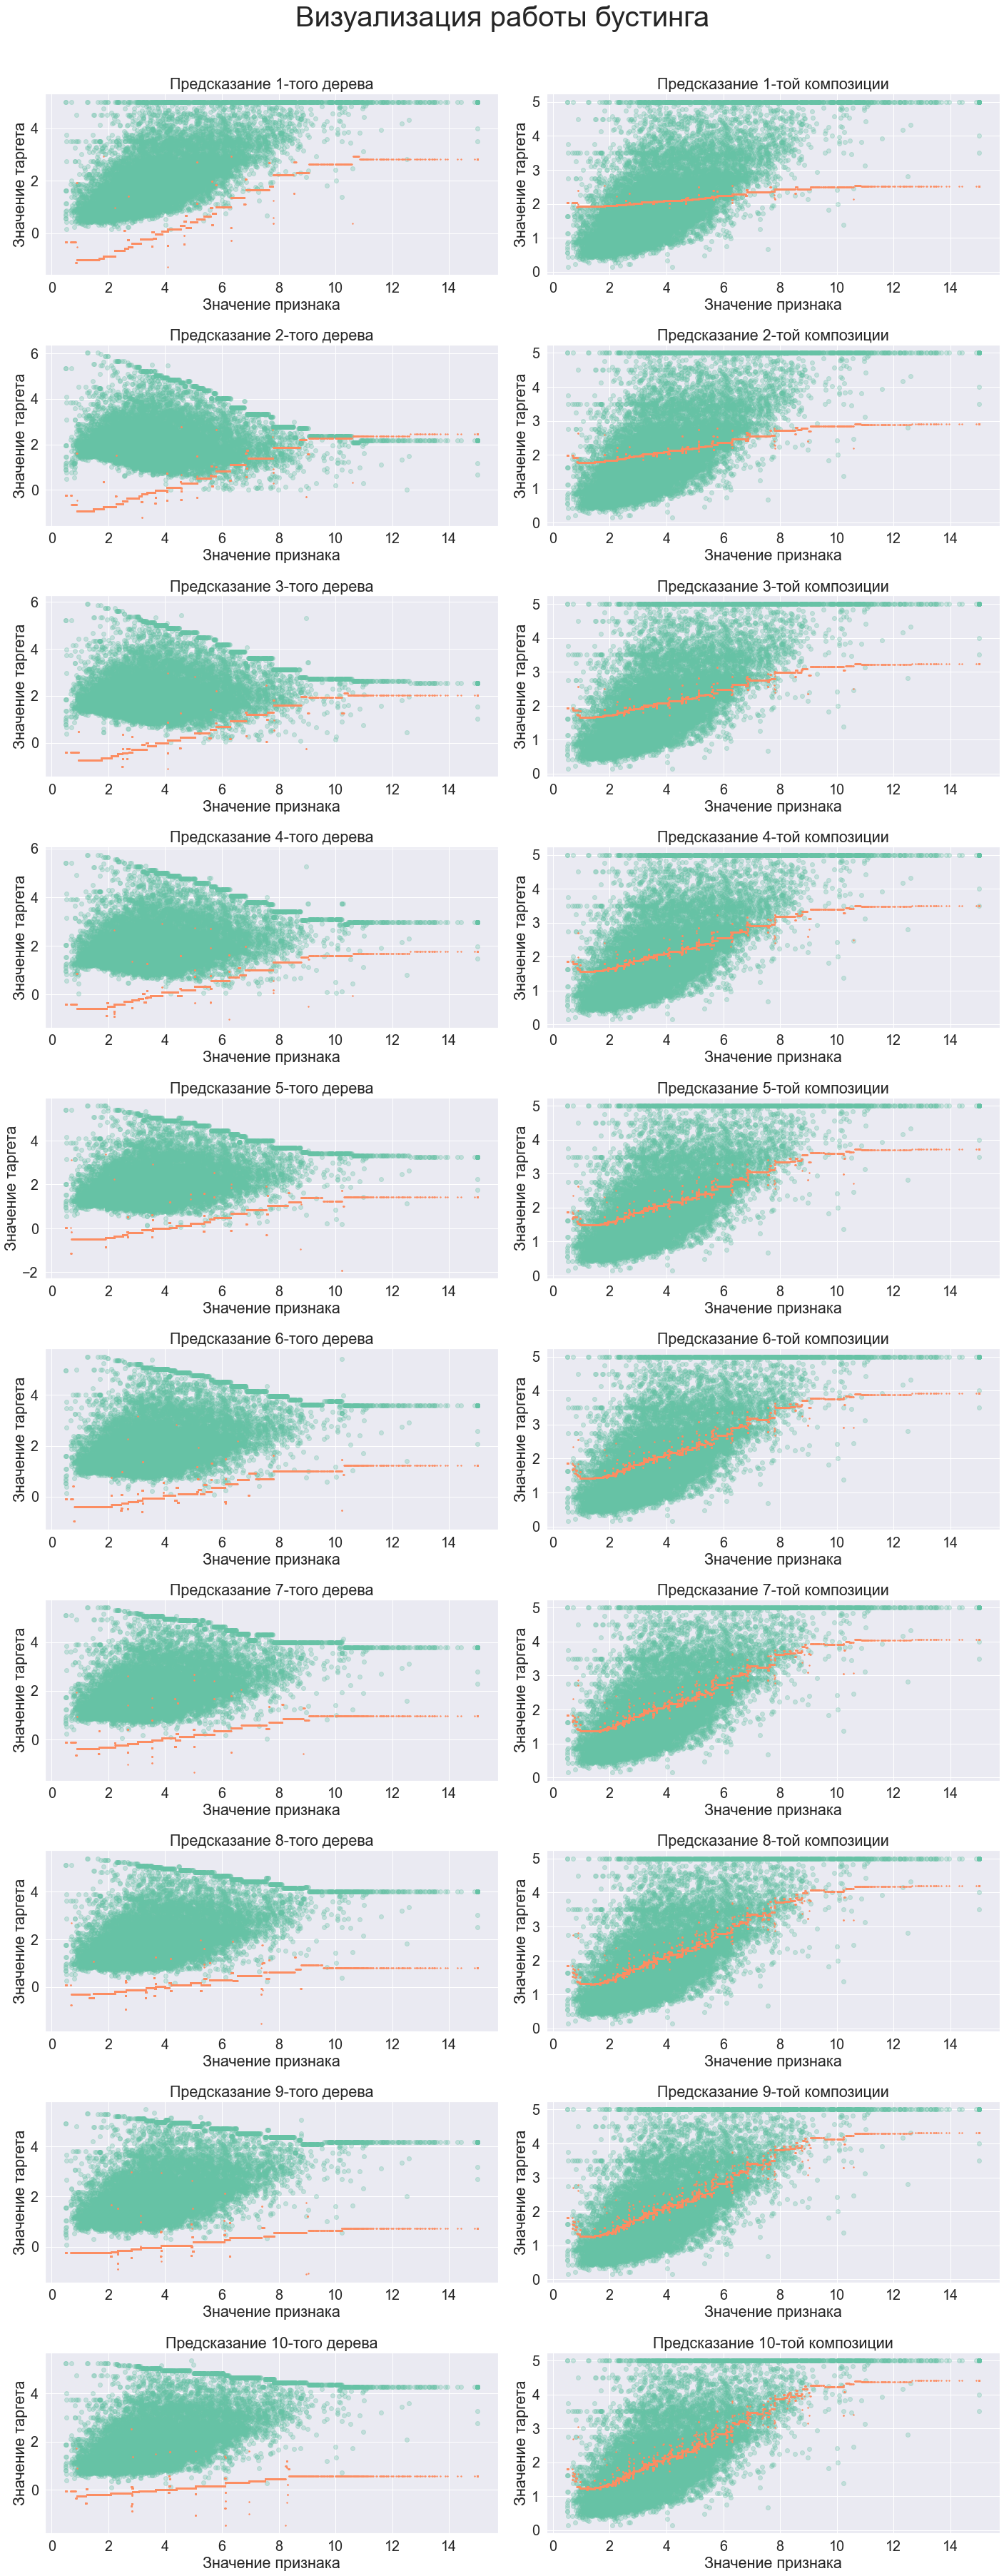

In [78]:
fig, axs = plt.subplots(10, 2, figsize=(20, 50))

residuals = y_train.copy()

for i in range(10):
    base_model_pred = best_gb_model.estimators_[i][0].predict(imp_feature_train)
    axs[i][0].scatter(imp_feature_train.reshape(-1), residuals, alpha=0.3)
    axs[i][0].scatter(imp_feature_train.reshape(-1), base_model_pred, s=2)
    axs[i][0].set_title(f'–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ {i+1}-—Ç–æ–≥–æ –¥–µ—Ä–µ–≤–∞')
    axs[i][0].set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞')
    axs[i][0].set_ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞')
    
    axs[i][1].scatter(imp_feature_train.reshape(-1), y_train, alpha=0.3)
    axs[i][1].scatter(imp_feature_train.reshape(-1), cum_preds[i], s=2)
    axs[i][1].set_title(f'–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ {i+1}-—Ç–æ–π –∫–æ–º–ø–æ–∑–∏—Ü–∏–∏')
    axs[i][1].set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞')
    axs[i][1].set_ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞')
    
    residuals = np.abs(y_train - base_model_pred)
    
plt.suptitle('–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞–±–æ—Ç—ã –±—É—Å—Ç–∏–Ω–≥–∞', fontsize=40, y=1.005)
plt.tight_layout();

*–ü–æ –≥—Ä–∞—Ñ–∏–∫—É –≤–∏–¥–Ω–æ, —á—Ç–æ —Å –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏–µ–º —á–∏—Å–ª–∞ –¥–µ—Ä–µ–≤—å–µ–≤ –∫–æ–º–ø–æ–∑–∏—Ü–∏ –≤—Å—ë –ª—É—á—à–µ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É*

–ö–∞–∫ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –≤—ã–±–æ—Ä–∫–∞, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–π –æ–±—É—á–∞–µ—Ç—Å—è –Ω–æ–≤–∞—è –±–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –∏ –≤ –æ–±—â–µ–º —Å–ª—É—á–∞–µ? 

*–≠—Ç–æ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç–∞—Ä–≥–µ—Ç–æ–º –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –æ–Ω–∞ –µ—â–µ —É–º–Ω–æ–∂–∞–µ—Ç—Å—è –Ω–∞ —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è.* 

#### 4.

–ü–∞—Ä–∞–º–µ—Ç—Ä `init` —É –∫–ª–∞—Å—Å–∞ `GradientBoostingRegressor` –∑–∞–¥–∞–µ—Ç –º–æ–¥–µ–ª—å, –≤—ã–ø–æ–ª–Ω—è—é—â—É—é –Ω–∞—á–∞–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, —Å –∫–æ—Ç–æ—Ä—ã—Ö —Å—Ç–∞—Ä—Ç—É–µ—Ç –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∞–Ω—Å–∞–º–±–ª—è. –ö–∞–∫–∞—è –Ω–∞—á–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é?

In [59]:
best_gb_model.init_

DummyRegressor()

*–≠—Ç–æ –∑–Ω–∞–∞—á–∏—Ç, —á—Ç–æ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø–µ—Ä–≤–æ–≥–æ –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –≤–æ–∑—å–º–µ—Ç—Å—è —Å—Ä–µ–¥–Ω–∏–π —Ç–∞—Ä–≥–µ—Ç.*

–û–±—É—á–∏—Ç–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –Ω–∞ —Ä–µ—à–∞—é—â–∏—Ö –¥–µ—Ä–µ–≤—å—è—Ö, —É –∫–æ—Ç–æ—Ä–æ–≥–æ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É—é—â–µ–π –º–æ–¥–µ–ª–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è. –î–ª—è —ç—Ç–æ–≥–æ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `init` –ø–µ—Ä–µ–¥–∞–π—Ç–µ –º–æ–¥–µ–ª—å —Ä–∏–¥–∂-—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ `Ridge`, –∫–æ—Ç–æ—Ä–∞—è –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–∞, –Ω–æ –Ω–µ–æ–±—É—á–µ–Ω–∞. 

–ü–æ–¥–±–µ—Ä–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ç–∞–∫–æ–π –∫–æ–º–ø–æ–∑–∏—Ü–∏–∏. –ö–∞–∫ –≤—ã –±—É–¥–µ—Ç–µ –ø–æ–¥–±–∏—Ä–∞—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä —Ä–∏–¥–∂-—Ä–µ–≥—Ä–µ—Å—Å–∏–∏? –£–ª—É—á—à–∏–ª–æ—Å—å –ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ?

*–ó–∞–º–µ—á–∞–Ω–∏—è.* 

1. –î–ª—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ `alpha` –≤ `Ridge`-–º–æ–¥–µ–ª–∏ –≤–Ω—É—Ç—Ä–∏ `GradientBoostingRegressor` –≤–∞–º –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å –º–µ—Ç–æ–¥ `get_params()` —É –±—É—Å—Ç–∏–Ω–≥–∞.
2. –ù–µ –∑–∞–±—ã–≤–∞–π—Ç–µ, —á—Ç–æ —É –±—É—Å—Ç–∏–Ω–≥–∞ —Ç–æ–∂–µ –µ—Å—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä `alpha`, –Ω–µ –ø–µ—Ä–µ–ø—É—Ç–∞–π—Ç–µ –∏—Ö.

In [81]:
ridge_pipeline = Pipeline([('scaler', StandardScaler()), 
                           ('ridge', Ridge())])

gb_ridge_regressor = GradientBoostingRegressor(
    n_estimators=best_gb_model.n_estimators, init=ridge_pipeline, random_state=42
)

In [82]:
gb_ridge_gridsearch = RandomizedSearchCV(
    estimator=gb_ridge_regressor, 
    param_distributions={
        'max_depth': np.arange(3, 20), 
        'learning_rate': np.linspace(0.05, 0.5, 300),
        'init__ridge__alpha': np.logspace(-3, 3, 501)
    },
    cv=5,
    verbose=1,
    n_jobs=-2,
    n_iter=50,
    random_state=3,
)

gb_ridge_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(init=Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('ridge',
                                                                             Ridge())]),
                                                       n_estimators=85,
                                                       random_state=42),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'init__ridge__alpha': array([1.00000000e-03, 1.02801630e-03, 1.05681751e-03, 1.08642562e-03,
       1.11686325e-03, 1.14815362e-03, 1.18032064e-03, 1.21338885e-03...
       0.4638796 , 0.46538462, 0.46688963, 0.46839465, 0.46989967,
       0.47140468, 0.4729097 , 0.47441472, 0.47591973, 0.47742475,
       0.47892977, 0.48043478, 0.4819398 , 0.48344482, 0.48494983,
       0.48645485, 0.487

*–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤:*

In [83]:
gb_ridge_gridsearch.best_params_

{'max_depth': 9,
 'learning_rate': 0.1568561872909699,
 'init__ridge__alpha': 47.863009232263806}

*–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –ø–æ MSE:*

In [86]:
print(f'MSE –Ω–∞ —Ç–µ—Å—Ç–µ: {mean_squared_error(y_test, gb_ridge_gridsearch.predict(X_test)):.5f}')

MSE –Ω–∞ —Ç–µ—Å—Ç–µ: 0.23073


*–í—ã–≤–æ–¥: –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ, –≤–∑—è–≤ –¥—Ä—É–≥—É—é –ø–µ—Ä–≤–∏—á–Ω—É—é –º–æ–¥–µ–ª—å, –Ω–µ —É–¥–∞–ª–æ—Å—å, —Ö–æ—Ç—è —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏ —ç—Ç–æ –º–æ–∂–µ—Ç –ø—Ä–æ–∏–∑–æ–π—Ç–∏, —Ç–∞–∫ –∫–∞–∫ –∞–ª–≥–æ—Ä–∏—Ç–º –∂–∞–¥–Ω—ã–π. –ù–æ –≤–∏–¥–∏–º–æ –æ—Å–æ–±–æ–≥–æ –≤–∫–ª–∞–¥–∞ –≤ –ø–æ–Ω–∏–∂–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ —ç—Ç–æ –Ω–µ –¥–∞—Å—Ç (–ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ø–æ–¥–±—Ä–æ–±–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤), –ø–æ—ç—Ç–æ–º—É —ç—Ç–æ –¥–µ–ª–∞—é—Ç —Ä–µ–¥–∫–æ.* 

#### 5. 

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –º–æ–¥–µ–ª–∏ —Å–º–µ—Å–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ $\widehat{y}_{gb}$ –∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ $\widehat{y}_{rf}$ —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ —Ä–∞–Ω–µ–µ, –≤ –≤–∏–¥–µ
$$\widehat{y}(x) = w \widehat{y}_{gb}(x) +  (1-w) \widehat{y}_{rf}(x),$$
–≥–¥–µ $w \in [0, 1]$ &mdash; –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è. –ü–æ–¥–±–µ—Ä–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $w$ –∏ –≤—ã–≤–µ–¥–∏—Ç–µ –µ–≥–æ. –£–¥–∞–ª–æ—Å—å –ª–∏ –¥–æ–±–∏—Ç—å—Å—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ?

In [90]:
model_gb = GradientBoostingRegressor(
    **optimal_params, random_state=42
)
model_rf = RandomForestRegressor(
    n_estimators=200, max_depth=26, random_state=42
)

In [93]:
preds_gb = cross_val_predict(model_gb, X_train, y_train, cv=10)
preds_rf = cross_val_predict(model_rf, X_train, y_train, cv=10)

In [95]:
mse_values = []
w_values = np.linspace(0, 1, 101)

for w in w_values:
    predictions = w * preds_gb + (1 - w) * preds_rf
    mse_values.append(mean_squared_error(y_train, predictions))

In [96]:
best_w = w_values[np.argmin(mse_values)]
print(f'–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è: {best_w:.3f}')

–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è: 0.840


In [98]:
model_gb.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

preds_gb = model_gb.predict(X_test)
preds_rf = model_rf.predict(X_test)

predictions = w * preds_gb + (1 - w) * preds_rf
mse_test = mean_squared_error(y_test, predictions)
print(f'MSE –Ω–∞ —Ç–µ—Å—Ç–µ: {mse_test:.5f}')

MSE –Ω–∞ —Ç–µ—Å—Ç–µ: 0.22911


–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Å–º–µ—Å–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ –∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ —Å–æ –∑–Ω–∞—á–µ–Ω–∏–µ–º  ùë§=0.84  –¥–∞–µ—Ç —Ç–∞–∫–æ–π –∂–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –∫–∞–∫ –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ –±–µ–∑ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏.

**6.**

–°–¥–µ–ª–∞–π—Ç–µ –∏—Ç–æ–≥–æ–≤—ã–µ –≤—ã–≤–æ–¥—ã.

*–ü–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–∞—Ç—Ä–æ–≤ –≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–º –±—É—Å—Ç–∏–Ω–≥–µ –º–æ–∂–Ω–æ –¥–æ–±–∏—Ç—å—Å—è –ª—É—á—à–µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, —á–µ–º –¥–ª—è –º–æ–¥–µ–ª–∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞. –°–º–µ—Å—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –∏ –±—É—Å—Ç–∏–Ω–≥–∞ –∏–ª–∏ –≤—ã–±–æ—Ä –¥—Ä—É–≥–æ–π –ø–µ—Ä–≤–æ–π –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ –Ω–µ –¥–∞—é—Ç –æ—Å–æ–±–æ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞.*